In [1]:
%matplotlib inline

In [2]:
import numpy as np

from msslib.utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import functools as f

from sklearn import metrics

In [3]:
def normalise_confusion_matrix(cm: np.ndarray):
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(plt, score):
    c_m = normalise_confusion_matrix(score['c_matrix'])
    plt.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)

In [4]:
test_runs = ["A","B","C","D","E","F"]
results_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/20blocks/nearest_centroid/"
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/labels/"


In [5]:
test_results = []
for letter in test_runs:
    results_paths = listpaths(os.path.join(results_dir, letter))
    label_paths = [format_path(label_dir, 'png', only_basename(p)) for p in results_paths]

    load_results = map(lambda x: np.load(x).flatten(), results_paths)
    results = f.reduce(lambda x,y: np.append(y, x), load_results)

    load_labels = map(lambda x: misc.imread(x).flatten(), label_paths)
    labels = f.reduce(lambda x,y: np.append(y, x), load_labels)

    p,r,fs,_ = metrics.precision_recall_fscore_support(labels, results, average='weighted')
    c_m = metrics.confusion_matrix(labels, results)

    test_results.append(
        {'label': letter, 
         'precision': p,
         'recall': r,
         'fscore': fs,
         'c_matrix': c_m
        })

In [13]:
np.save(os.path.join(results_dir, "results.npy"), np.asarray(test_results))

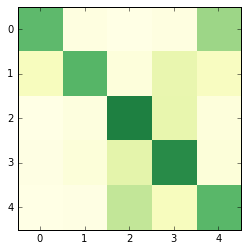

In [10]:
plot_confusion_matrix(plt, test_results[])

array([ {'label': 'A', 'precision': 0.81451273946107494, 'recall': 0.68061850925925926, 'fscore': 0.71279141073375807, 'c_matrix': array([[ 2941989,    60082,    34296,    13255,   117915],
       [ 7990827, 32712694,  3515481,  4968598,  5865432],
       [   17748,   441667, 10837498,  1742046,  5480053],
       [    8736,    84057,   615024,   627302,   234884],
       [    2700,   222300,   777701,  2300399, 26387316]])},
       {'label': 'B', 'precision': 0.83388255465431893, 'recall': 0.66308352777777779, 'fscore': 0.71768412221746358, 'c_matrix': array([[ 3027509,    47162,      450,    42892,    58628],
       [ 9372355, 35454507,   935805,  6352261,  2848453],
       [   36560,   556737, 13037462,  3867320,  1067998],
       [    7685,   101480,   165469,  1135976,   100154],
       [    8291,   300914,  7456814,  3059551, 18957567]])},
       {'label': 'C', 'precision': 0.77487995564006351, 'recall': 0.58624131481481478, 'fscore': 0.62914510327488837, 'c_matrix': array([[ 1686